<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/NLP_Twitter_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Disaster Tweets - Fake or Not**

Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

But, it’s not always clear whether a person’s words are actually announcing a disaster. The following program helps in identifying a tweet programatically if a tweet conveys disaster info or not.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Data Pre Processing](#2)
  3. [Exploring the dataset](#3)
  4. [Natural Language Processing](#4)
  5. [Model Training and Results](#5)
  6. [Predictions](#6)
  7. [Summary](#7)
  8. [References](#8)

# <font color="dimgrey" size=+2.0><b>1: AboutDataset</b></font> <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)


I am predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.



# <font color="darkslateblue" size=+2.0><b>2: Data Pre Processing</b></font> <a name="2"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Importing all the required libraries

In [49]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

Downloading the dataset from Kaggle

In [50]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/c/nlp-getting-started/data'
od.download(dataset_url)

Saving kaggle.json to kaggle (2).json
Requirement already up-to-date: opendatasets in /usr/local/lib/python3.7/dist-packages (0.1.11)
nlp-getting-started.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzipping the files and moving them to Train folder

In [ ]:
import zipfile
import os

parent_dir = '/content/nlp-getting-started'
directory = 'Train'

path = os.path.join(parent_dir, directory)
os.mkdir(path)

with zipfile.ZipFile('/content/nlp-getting-started/nlp-getting-started.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

In [52]:
df = pd.read_csv("/content/nlp-getting-started/Train/train.csv")

df.shape

(7613, 5)

Accessing few sample records

In [53]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# <font color="darkslateblue" size=+2.0><b>3: Exploratory Data Analysis</b></font>
<a id="3"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

So now we will go trough an exploratory data analysis to get insights from tweets. The aim here is to divide this session into topics so we can explore graphics for each subject.

# <a name="2"></a>
<font color="dimgrey" size=+2.0><b>3.1: Labels distribution</b></font>

In [54]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [55]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

# https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate/34294022
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
pattern = re.compile(r"https?://(\S+|www)\.\S+")
for t in df.text:
    matches = pattern.findall(t)
    for match in matches:
        print(t)
        print(match)
        print(pattern.sub(r"", t))
    if len(matches) > 0:
        break

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
t
@bbcmtd Wholesale Markets ablaze 


In [57]:
df["text"] = df.text.map(remove_URL) # map(lambda x: remove_URL(x))
df["text"] = df.text.map(remove_punct)

In [58]:
# remove stopwords
# pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [60]:
df["text"] = df.text.map(remove_stopwords)

In [61]:
df.text

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [62]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(df.text)

In [63]:
len(counter)

17971

In [64]:

counter.most_common(5)

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229)]

In [65]:
num_unique_words = len(counter)

In [66]:
# Split dataset into training and validation set
train_size = int(df.shape[0] * 0.8)

train_df = df[:train_size]
val_df = df[train_size:]

# split text and labels
# train_sentences = train_df.text.to_numpy()
# train_labels = train_df.target.to_numpy()
# val_sentences = val_df.text.to_numpy()
# val_labels = val_df.target.to_numpy()

train_sentences = train_df.text
train_labels = train_df.target
val_sentences = val_df.text
val_labels = val_df.target

In [67]:
train_sentences

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
6085            feel like sinking low selfimage take quiz
6086             years afloat pension plans start sinking
6087              feel like sinking unhappiness take quiz
6088    sinking music video tv career brooke hogan tha...
6089    supernovalester feel bad literally feel feelin...
Name: text, Length: 6090, dtype: object

In [68]:

# Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences) # fit only to training

In [69]:
word_index = tokenizer.word_index

word_index

{'like': 1,
 'amp': 2,
 'fire': 3,
 'im': 4,
 'get': 5,
 'via': 6,
 'new': 7,
 'people': 8,
 'news': 9,
 'dont': 10,
 'emergency': 11,
 'one': 12,
 '2': 13,
 'us': 14,
 'video': 15,
 'disaster': 16,
 'burning': 17,
 'body': 18,
 'would': 19,
 'buildings': 20,
 'police': 21,
 'crash': 22,
 'first': 23,
 'california': 24,
 'still': 25,
 'man': 26,
 'got': 27,
 'know': 28,
 'day': 29,
 'back': 30,
 'going': 31,
 'two': 32,
 'time': 33,
 'full': 34,
 'accident': 35,
 'see': 36,
 'world': 37,
 'attack': 38,
 'nuclear': 39,
 'youtube': 40,
 'may': 41,
 'love': 42,
 'go': 43,
 'rt': 44,
 'many': 45,
 'cant': 46,
 '3': 47,
 'watch': 48,
 'collapse': 49,
 'dead': 50,
 'today': 51,
 'car': 52,
 'mass': 53,
 'want': 54,
 'years': 55,
 'work': 56,
 'train': 57,
 'last': 58,
 'good': 59,
 'think': 60,
 'families': 61,
 'hiroshima': 62,
 'life': 63,
 'fires': 64,
 'best': 65,
 'could': 66,
 'say': 67,
 'u': 68,
 'death': 69,
 'hot': 70,
 'forest': 71,
 'way': 72,
 'killed': 73,
 'need': 74,
 'legion

In [70]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [71]:

print(train_sentences[10:15])
print(train_sequences[10:15])

10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa 18 19 ...
13                      flood bago myanmar arrived bago
14        damage school bus 80 multi car crash breaking
Name: text, dtype: object
[[520, 8, 395, 156, 297, 411], [749, 470, 2248, 138, 2249, 2813, 521, 611, 188, 470, 2248, 189, 189, 5679, 117], [2814, 117, 1884, 5680, 2248, 1285, 1450, 522, 256, 644, 2815], [99, 3742, 612, 1451, 3742], [111, 91, 336, 3743, 3744, 52, 22, 312]]


In [72]:

# Pad the sequences to have the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Max number of words in a sequence
max_length = 20

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding="post", truncating="post")
train_padded.shape, val_padded.shape

((6090, 20), (1523, 20))

In [73]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(train_padded)
training_labels = np.array(train_labels)
testing_padded = np.array(val_padded)
testing_labels = np.array(val_labels)

In [74]:

print(train_sentences[10])
print(train_sequences[10])
print(train_padded[10])

three people died heat wave far
[520, 8, 395, 156, 297, 411]
[520   8 395 156 297 411   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [75]:
# Check reversing the indices

# flip (key, value)
# reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

In [ ]:
# reverse_word_index

In [ ]:

# def decode(sequence):
#     return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

In [ ]:
# decoded_text = decode(train_sequences[10])

# print(train_sequences[10])
# print(decoded_text)

In [111]:
# Create LSTM model
from tensorflow.keras import layers

# Embedding: https://www.tensorflow.org/tutorials/text/word_embeddings
# Turns positive integers (indexes) into dense vectors of fixed size. (other approach could be one-hot-encoding)

# Word embeddings give us a way to use an efficient, dense representation in which similar words have 
# a similar encoding. Importantly, you do not have to specify this encoding by hand. An embedding is a 
# dense vector of floating point values (the length of the vector is a parameter you specify).

model = keras.models.Sequential()
model.add(layers.Embedding(num_unique_words, 32, input_length=max_length))

# The layer will take as input an integer matrix of size (batch, input_length),
# and the largest integer (i.e. word index) in the input should be no larger than num_words (vocabulary size).
# Now model.output_shape is (None, input_length, 32), where `None` is the batch dimension.


model.add(layers.LSTM(64, dropout=0.1))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 32)            575072    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [113]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_unique_words, 32, input_length=max_length),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.LSTM(64, dropout=0.1),
    # model.add(layers.LSTM(64, dropout=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [114]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 20, 32)            575072    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [115]:

# loss = keras.losses.BinaryCrossentropy(from_logits=False)
# optim = keras.optimizers.Adam(lr=0.001)
# metrics = ["accuracy"]

# model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [116]:
history = model.fit(train_padded, train_labels, epochs=5, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/5
191/191 - 5s - loss: 0.5565 - accuracy: 0.7108 - val_loss: 0.4944 - val_accuracy: 0.7741
Epoch 2/5
191/191 - 2s - loss: 0.3000 - accuracy: 0.8828 - val_loss: 0.5931 - val_accuracy: 0.7597
Epoch 3/5
191/191 - 2s - loss: 0.1632 - accuracy: 0.9479 - val_loss: 0.5549 - val_accuracy: 0.7722
Epoch 4/5
191/191 - 1s - loss: 0.1221 - accuracy: 0.9632 - val_loss: 0.5833 - val_accuracy: 0.7511
Epoch 5/5
191/191 - 2s - loss: 0.0866 - accuracy: 0.9755 - val_loss: 0.7443 - val_accuracy: 0.7656


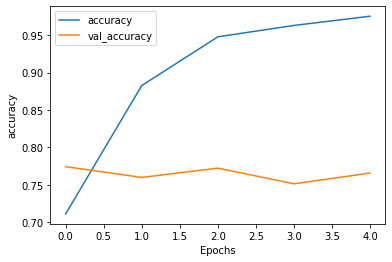

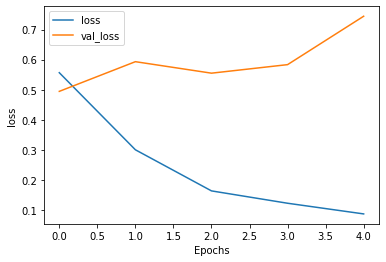

In [117]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [118]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(train_padded[2]))
print(train_sentences[2])
print(train_labels[2])

residents asked shelter place notified officers evacuation shelter place orders expected ? ? ? ? ? ? ? ? ?
residents asked shelter place notified officers evacuation shelter place orders expected
1


In [119]:
train_padded

array([[ 3739,   696,   235, ...,     0,     0,     0],
       [   71,     3,   129, ...,     0,     0,     0],
       [ 1448,  1186,  1882, ...,     0,     0,     0],
       ...,
       [  151,     1,  1256, ...,     0,     0,     0],
       [ 1256,   448,    15, ...,     0,     0,     0],
       [15469,   151,   204, ...,     0,     0,     0]], dtype=int32)

In [120]:
predictions = model.predict(train_padded)

In [121]:
predictions

array([[0.98842466],
       [0.9969734 ],
       [0.9941645 ],
       ...,
       [0.00653304],
       [0.00568664],
       [0.00614526]], dtype=float32)

In [122]:

predictions = model.predict(train_padded)
predictions = [1 if p > 0.5 else 0 for p in predictions]

In [123]:

print(train_sentences[10:20])

print(train_labels[10:20])
print(predictions[10:20])

10                      three people died heat wave far
11    haha south tampa getting flooded hah wait seco...
12    raining flooding florida tampabay tampa 18 19 ...
13                      flood bago myanmar arrived bago
14        damage school bus 80 multi car crash breaking
15                                            whats man
16                                          love fruits
17                                        summer lovely
18                                             car fast
19                                      goooooooaaaaaal
Name: text, dtype: object
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    0
Name: target, dtype: int64
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
